# Task

Create a convolutional neural network to process the MNIST dataset.

Compare it with a neural network with fully connected layers.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and display data

In [41]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Reminder that values take on shades of grey 0 - 255
* 0 is black
* 255 is white

In [42]:
img = X_train[0]
print (f"min:{np.amin(X_train[0])} max:{np.amax(X_train[0])}")

min:0 max:255


In [43]:
def show_images (images, labels, rows=6, cols=10):
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    for idx in range (0, rows * cols):
        ridx=idx // cols
        cidx=idx % cols
        ax= axes[ridx, cidx]
        ax.axis("off")
        ax.imshow(images[idx], cmap="gray_r")
        ax.set_title(f"{labels[idx]}")
    plt.show()    

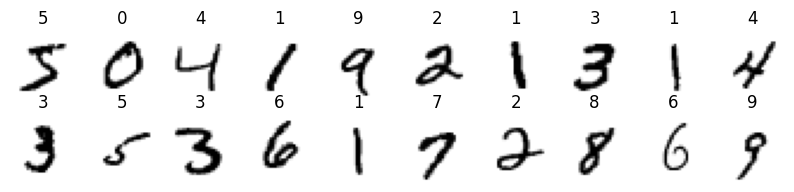

In [44]:
show_images(X_train, Y_train, 2, 10)

# Data preparation

Standardization of values from range 0 - 255 to range 0 - 1

In [45]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [46]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)


Binary encoding

In [47]:
from keras.utils import to_categorical 
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

# Neural network

In [48]:
import keras
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

In [49]:
# Creating and learning the model

from keras.layers import Input, Flatten

fc_model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")
])

fc_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

fc_history = fc_model.fit(
    X_train, Y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=128
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7956 - loss: 0.7101 - val_accuracy: 0.9535 - val_loss: 0.1709
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9372 - loss: 0.2187 - val_accuracy: 0.9667 - val_loss: 0.1208
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9559 - loss: 0.1561 - val_accuracy: 0.9733 - val_loss: 0.0984
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9629 - loss: 0.1247 - val_accuracy: 0.9757 - val_loss: 0.0880
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9675 - loss: 0.1090 - val_accuracy: 0.9757 - val_loss: 0.0798
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9719 - loss: 0.0898 - val_accuracy: 0.9787 - val_loss: 0.0785
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.0825 - val_accuracy: 0.9777 - val_loss: 0.0739
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9802 - loss: 0.0674 - val_accuracy: 0.

In [50]:
from keras.layers import Input

cnn_model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

cnn_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

cnn_history = cnn_model.fit(
    X_train_cnn, Y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=128
)

cnn_model.save("classification_model_mnist.keras")



Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8555 - loss: 0.5138 - val_accuracy: 0.9788 - val_loss: 0.0707
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9798 - loss: 0.0672 - val_accuracy: 0.9858 - val_loss: 0.0495
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9858 - loss: 0.0467 - val_accuracy: 0.9873 - val_loss: 0.0469
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9896 - loss: 0.0339 - val_accuracy: 0.9897 - val_loss: 0.0407
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9918 - loss: 0.0258 - val_accuracy: 0.9870 - val_loss: 0.0454
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9938 - loss: 0.0201 - val_accuracy: 0.9890 - val_loss: 0.0421
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9953 - loss: 0.0158 - val_accuracy: 0.9893 - val_loss: 0.0445
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9967 - loss: 0.0117 - val_accu

# History of learning model
- Show learning curve
- Show model accuracy curve
- Describe the shapes

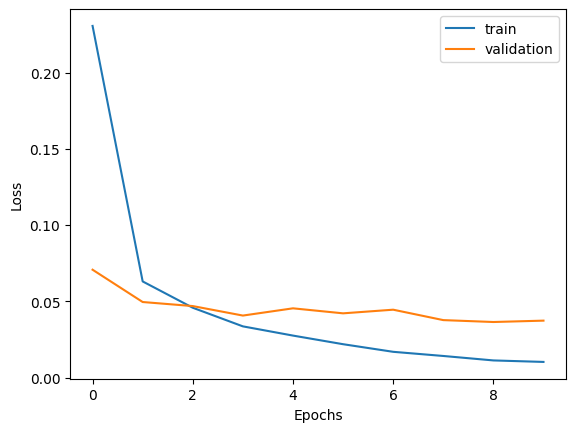

In [51]:
plt.plot(cnn_history.history["loss"], label="train")
plt.plot(cnn_history.history["val_loss"], label="validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


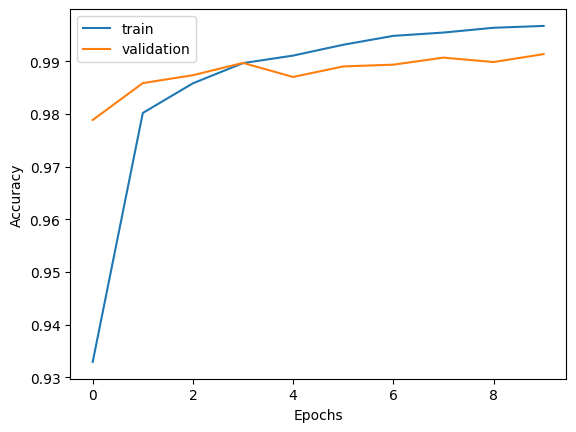

In [52]:
plt.plot(cnn_history.history["accuracy"], label="train")
plt.plot(cnn_history.history["val_accuracy"], label="validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


Input image ---   (28, 28, 1)

After Conv2D(32) --- (26, 26, 32)

After MaxPooling --- (13, 13, 32)

After Conv2D(64) -- (11, 11, 64)

After MaxPooling -- (5, 5, 64)

Flattened -- 1600
Output --  10

# Model Verification
- R2 score
- Accuracy of the model as a whole
- Accuracy across classes
- Change matrix
- Examples of misclassification

In [53]:
from sklearn.metrics import r2_score

cnn_preds = cnn_model.predict(X_test_cnn)
fc_preds = fc_model.predict(X_test)

print(r2_score(Y_test, cnn_preds))
print(r2_score(Y_test, fc_preds))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
0.986295800339926
0.9618774255319253


In [54]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test_cnn, Y_test)
fc_test_loss, fc_test_acc = fc_model.evaluate(X_test, Y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9901 - loss: 0.0314
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.9724 - loss: 0.0859


In [55]:
from sklearn.metrics import classification_report

cnn_classes = np.argmax(cnn_preds, axis=1)
true_classes = np.argmax(Y_test, axis=1)

print(classification_report(true_classes, cnn_classes))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



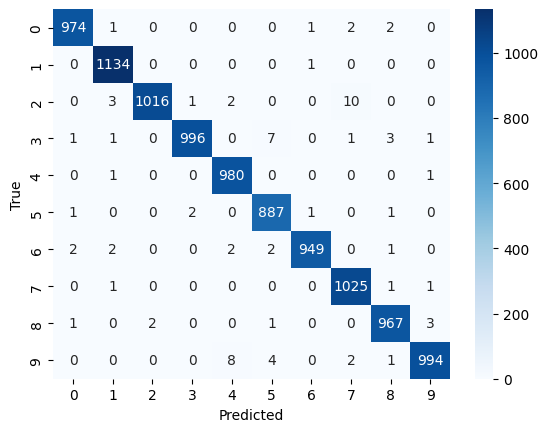

In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_classes, cnn_classes)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


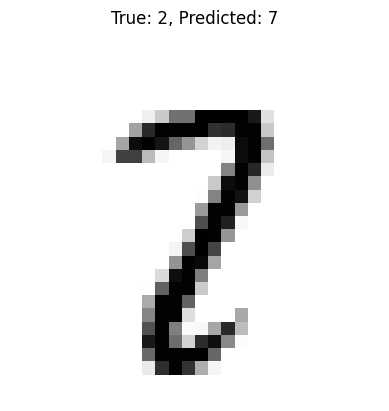

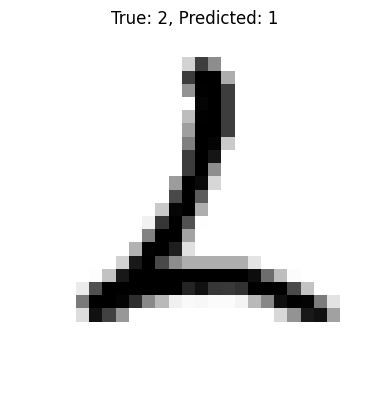

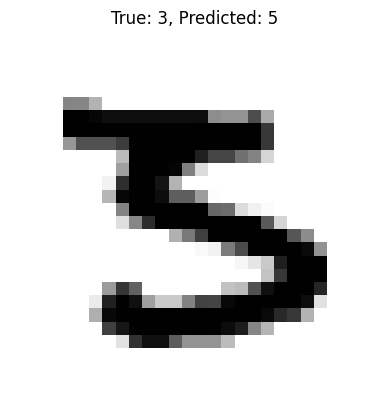

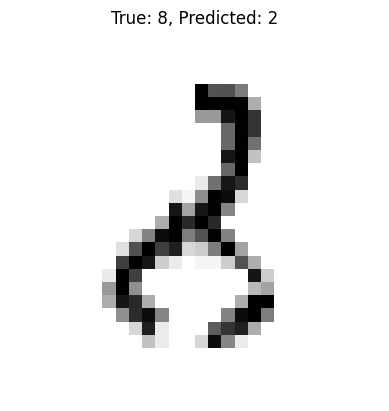

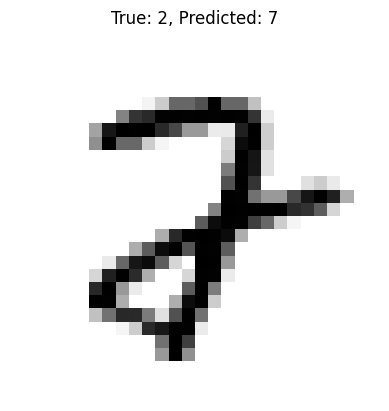

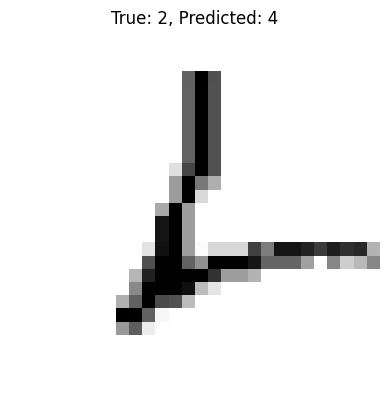

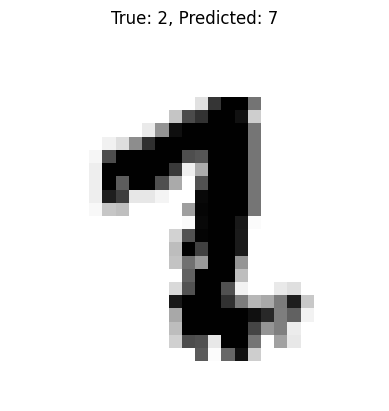

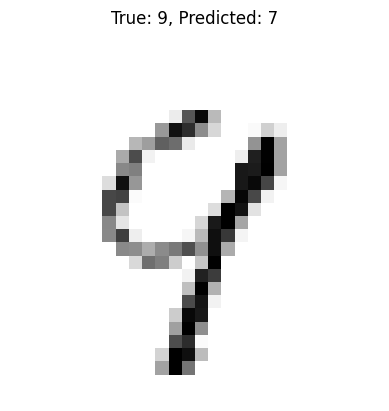

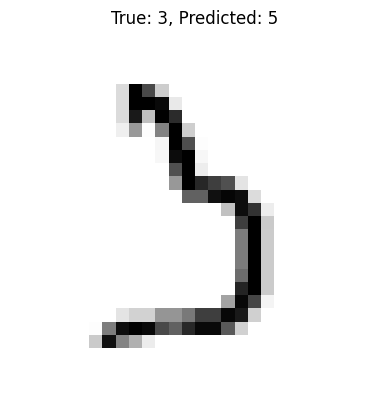

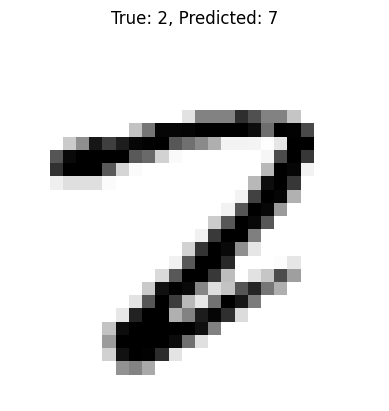

In [57]:
mis_idx = np.where(cnn_classes != true_classes)[0][:10]

for i in mis_idx:
    plt.imshow(X_test[i], cmap="gray_r")
    plt.title(f"True: {true_classes[i]}, Predicted: {cnn_classes[i]}")
    plt.axis("off")
    plt.show()


# Model Comparison
- Which model is more accurate
- How about the learning time
- How about the time of inference

CNN

Fully connected Faster training (fewer parameters) and CNN is Slower training

Fully connected Faster inference and CNN is Slightly slower inference but still real-time capable